In [1]:
import requests
import pandas as pd
import statistics as st
import numpy as np
from datetime import datetime

In [2]:
combined_df = pd.read_csv('Resources/combined_data.csv')

In [3]:
combined_df

,Year,Month,State,TAVG,Population,Consumption
0,2001,1,Alabama,41.736,4467634,6.414051e+10
1,2001,2,Alabama,52.996,4467634,5.507025e+10
2,2001,3,Alabama,52.004,4467634,5.705739e+10
3,2001,4,Alabama,64.964,4467634,4.786033e+10
4,2001,5,Alabama,71.092,4467634,6.004433e+10
...,...,...,...,...,...,...
4279,2007,8,Wyoming,68.132,534876,4.628489e+10
4280,2007,9,Wyoming,57.536,534876,4.356606e+10
4281,2007,10,Wyoming,45.324,534876,4.362796e+10
4282,2007,11,Wyoming,34.868,534876,4.346201e+10


In [4]:
combined_df.rename(columns = {'TAVG':'Temperature'}, inplace = True)
combined_df

,Year,Month,State,Temperature,Population,Consumption
0,2001,1,Alabama,41.736,4467634,6.414051e+10
1,2001,2,Alabama,52.996,4467634,5.507025e+10
2,2001,3,Alabama,52.004,4467634,5.705739e+10
3,2001,4,Alabama,64.964,4467634,4.786033e+10
4,2001,5,Alabama,71.092,4467634,6.004433e+10
...,...,...,...,...,...,...
4279,2007,8,Wyoming,68.132,534876,4.628489e+10
4280,2007,9,Wyoming,57.536,534876,4.356606e+10
4281,2007,10,Wyoming,45.324,534876,4.362796e+10
4282,2007,11,Wyoming,34.868,534876,4.346201e+10


In [5]:
# calculate energy per person to normalize for population
combined_df['Energy per Person'] = combined_df['Consumption'] / combined_df['Population']
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption,Energy per Person
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327
1,2001,2,Alabama,52.996,4467634,5.507025e+10,12326.489885
2,2001,3,Alabama,52.004,4467634,5.705739e+10,12771.275951
3,2001,4,Alabama,64.964,4467634,4.786033e+10,10712.679960
4,2001,5,Alabama,71.092,4467634,6.004433e+10,13439.850849


In [6]:
# create a ratio number for pupolation
# build total population series
population_totals = combined_df.groupby(['Year', 'Month'])['Population'].sum()

# merge the data back into the dataset
combined_df = combined_df.merge(population_totals, on=['Year', 'Month'])

# create a percent of total population column to normalize other data
combined_df['Percent of Population'] = combined_df['Population_x'] / combined_df['Population_y']

combined_df

,Year,Month,State,Temperature,Population_x,Consumption,Energy per Person,Population_y,Percent of Population
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994
...,...,...,...,...,...,...,...,...,...
4279,2007,12,Virginia,41.064,7751000,2.937967e+10,3790.436643,301231207,0.025731
4280,2007,12,Washington,34.392,6461587,1.622488e+10,2510.974137,301231207,0.021451
4281,2007,12,West Virginia,36.744,1834052,6.150771e+10,33536.511949,301231207,0.006089
4282,2007,12,Wisconsin,18.092,5610775,4.547159e+10,8104.332626,301231207,0.018626


In [7]:
# Calculate normalized power and temperature numbers
combined_df['Temperature N'] = combined_df['Temperature'] * combined_df['Percent of Population']
combined_df['Power N'] = combined_df['Energy per Person'] * combined_df['Percent of Population']
combined_df.head()

,Year,Month,State,Temperature,Population_x,Consumption,Energy per Person,Population_y,Percent of Population,Temperature N,Power N
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678,0.654321,225.078936
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224,0.046904,19.976815
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505,0.810020,147.851340
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445,0.346221,98.130188
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994,5.361958,367.720486


In [8]:
# add a date column
combined_df['Date'] = pd.to_datetime(combined_df['Year']*10000+combined_df['Month']*100+15,format='%Y%m%d')
#pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')
# source: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
combined_df

,Year,Month,State,Temperature,Population_x,Consumption,Energy per Person,Population_y,Percent of Population,Temperature N,Power N,Date
0,2001,1,Alabama,41.736,4467634,6.414051e+10,14356.706327,284968955,0.015678,0.654321,225.078936,2001-01-15
1,2001,1,Alaska,21.092,633714,5.692772e+09,8983.188315,284968955,0.002224,0.046904,19.976815,2001-01-15
2,2001,1,Arizona,43.772,5273477,4.213304e+10,7989.613251,284968955,0.018505,0.810020,147.851340,2001-01-15
3,2001,1,Arkansas,36.656,2691571,2.796406e+10,10389.492669,284968955,0.009445,0.346221,98.130188,2001-01-15
4,2001,1,California,44.316,34479458,1.047889e+11,3039.169663,284968955,0.120994,5.361958,367.720486,2001-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,2007,12,Virginia,41.064,7751000,2.937967e+10,3790.436643,301231207,0.025731,1.056620,97.531975,2007-12-15
4280,2007,12,Washington,34.392,6461587,1.622488e+10,2510.974137,301231207,0.021451,0.737729,53.861876,2007-12-15
4281,2007,12,West Virginia,36.744,1834052,6.150771e+10,33536.511949,301231207,0.006089,0.223717,204.187698,2007-12-15
4282,2007,12,Wisconsin,18.092,5610775,4.547159e+10,8104.332626,301231207,0.018626,0.336984,150.952444,2007-12-15


In [9]:
power_by_date = combined_df.groupby('Date')['Power N'].sum()
power_by_date.head()

Date
2001-01-15    7939.798218
2001-02-15    6668.071497
2001-03-15    7083.863270
2001-04-15    6628.745333
2001-05-15    7212.832371
Name: Power N, dtype: float64

In [10]:
temp_by_date = combined_df.groupby('Date')['Temperature N'].sum()
temp_by_date.head()

Date
2001-01-15    34.348641
2001-02-15    38.844089
2001-03-15    43.380498
2001-04-15    55.736487
2001-05-15    64.790428
Name: Temperature N, dtype: float64

In [11]:
#us_power_temp = power_by_date.merge(temp_by_date, on='Date')

us_power_temp = pd.DataFrame(dict(temp_by_date = temp_by_date, power_by_date = power_by_date)).reset_index()
us_power_temp

,Date,temp_by_date,power_by_date
0,2001-01-15,34.348641,7939.798218
1,2001-02-15,38.844089,6668.071497
2,2001-03-15,43.380498,7083.863270
3,2001-04-15,55.736487,6628.745333
4,2001-05-15,64.790428,7212.832371
...,...,...,...
79,2007-08-15,76.016462,9871.638050
80,2007-09-15,69.036910,8112.199482
81,2007-10-15,60.953091,7578.406435
82,2007-11-15,47.163255,6893.255701


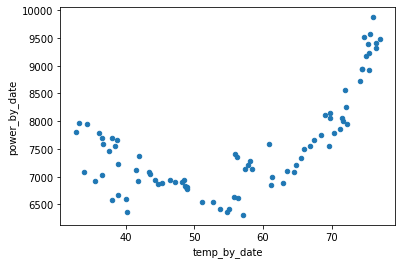

In [12]:
us_power_temp.plot(kind='scatter', x='temp_by_date', y='power_by_date')